# Visualising the Topic Modelling Results

This notebook visualises the results from the previous notebook containing topic models across towns and categories. Sentiment scores are applied using VADER to each noun phrase
* Section 1 - Import libraries and dataset
* Section 2 - Data preparation and EDA
* Section 3 - Category analysis for Arun Distict
* Section 4 - Sentiment scores across categories
* Section 5 - Comparing aspects and towns


Datasets need to run notebook:
* topicmodelsaccom.csv
* topicmodelsfood.csv
* topicmodelsattract.csv

Data save to:
* combined_sentiment.csv
* combined_sentiment_test.csv


# Section 1: Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\imoge\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read in datasets
df_accom = pd.read_csv("topicmodelsaccom.csv")
df_food = pd.read_csv("topicmodelsfood.csv")
df_attract = pd.read_csv("topicmodelsattract.csv")

df_accom_test = pd.read_csv("topicmodelsaccomtest.csv")
df_food_test = pd.read_csv("topicmodelsfoodtest.csv")
df_attract_test = pd.read_csv("topicmodelsattracttest.csv")

In [5]:
# Add the category columns to the test dataframes
df_accom_test["Category"] = "Accommodation"
df_food_test["Category"] = "Food"
df_attract_test["Category"] = "Attract"

# Section 2: Data Preparation and EDA

In [18]:
# Convert sentiment score to positive to negative with VADER (above 0.05 positive, below -0.05 negative and between is 
# neutral as per the VADER notes)
sid = SentimentIntensityAnalyzer()

def polar(x): 
    if x >= 0.05:
        return 'positive'
    elif x <0.05 and x>= -0.05:
        return 'neutral'
    else:
        return 'negative'

In [19]:
def sent(df):
    df["Sentiment"] = df["noun_phrases"].apply(lambda x: sid.polarity_scores(x)["compound"])
    df["Score"] = df["Sentiment"].apply(lambda x: polar(x))

In [20]:
# Run function to get sentiment and convert to 'positive','negative' and 'neutral'
sent(df_accom)
sent(df_food)
sent(df_attract)
sent(df_accom_test)
sent(df_food_test)
sent(df_attract_test)

In [21]:
print(df_accom.shape,df_accom_test.shape,df_food.shape, df_food_test.shape, df_attract.shape,df_attract_test.shape)

(23989, 13) (649, 11) (39651, 13) (952, 11) (7527, 13) (210, 11)


In [22]:
combined_sentiment = pd.concat([df_accom,df_food,df_attract],axis = 0,ignore_index = True)
combined_sentiment_test = pd.concat([df_accom_test,df_food_test,df_attract_test],axis = 0,ignore_index = True)
combined_sentiment.to_csv("combined_sentiment.csv")
combined_sentiment_test.to_csv("combined_sentiment_test.csv")

In [23]:
df_accom["Score"].value_counts()

neutral     13473
positive     8851
negative     1665
Name: Score, dtype: int64

In [24]:
df_food["Score"].value_counts()

neutral     20579
positive    16817
negative     2255
Name: Score, dtype: int64

In [25]:
df_attract["Score"].value_counts()

neutral     4029
positive    3151
negative     347
Name: Score, dtype: int64

In [26]:
# Plot review noun phrase counts per category
def counts(df,name):
    
    df_count = df["Topic Count"].value_counts().reset_index()
    df_count.columns = ["Topic","Count"]
    #df_count.sort_values("Topic",ascending = False,inplace = True)
    fig, ax = plt.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title("Number of Review Noun Phrases By Aspect: " + name,fontsize = 10)
    ax.set_xlabel("Number",fontsize = 8,labelpad = 10)
    ax.barh(df_count["Topic"],df_count["Count"],color = "lightsteelblue")
    ax.invert_yaxis()
    plt.show()
    

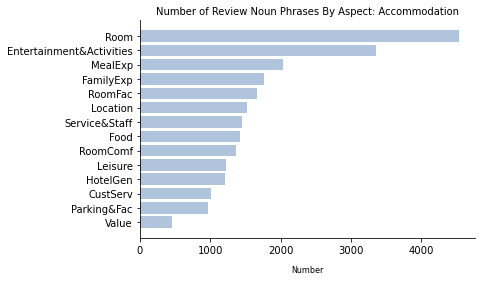

In [27]:
counts(df_accom,"Accommodation")

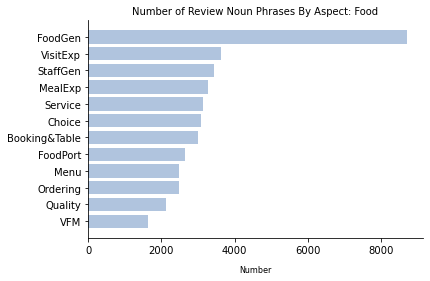

In [28]:
counts(df_food, "Food")

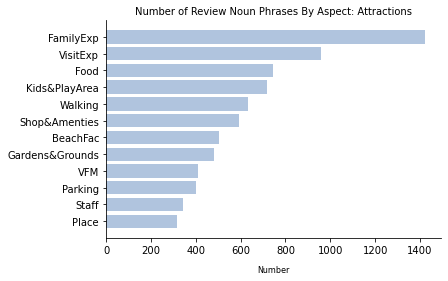

In [29]:
counts(df_attract,"Attractions")

Comments:

* Unsurprisingly, the most reviewed category for accommodation and Food is 'Rooms' and 'Food'
* The most reviewed aspect for Attractions is the quality of the 'Family Experience'
* Interestingly, the lowest number of review phrases are for value for money for the first two categories

# Section 3: Category Analysis

In [30]:
# Numbers of aspects split into positive and negative into one dataframe

def aspect_all(df):
    
    pos_df = df[df["Score"] == "positive"]
    neg_df = df[df["Score"] == "negative"]
    pos_df = pd.DataFrame(pos_df["Topic Count"].value_counts())
    neg_df = pd.DataFrame(neg_df["Topic Count"].value_counts())
    pos_df.columns = ["Num Pos"]
    neg_df.columns = ["Num Neg"]
    df_sent = pd.concat([pos_df,neg_df],axis = 1)
    df_sent["%Pos"] = round(df_sent["Num Pos"]/(df_sent["Num Pos"] + df_sent["Num Neg"]),2)*100
    df_sent["%Neg"] = round(df_sent["Num Neg"]/(df_sent["Num Pos"] + df_sent["Num Neg"]),2)*100
    df_sent.sort_index(inplace = True)
    return df_sent
    

In [31]:
def graph_sentiment_numbers(name,df):
    
    labels = list(df.index)
    pos = list(df["%Pos"])
    neg = list(df["%Neg"]*-1)

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize = (10,6))
    ax.barh(x - width/2, pos, width, label='Pos',color = "lightsteelblue")
    ax.barh(x + width/2, neg, width, label='Neg',color = "slategrey")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(name + " - % Positive and Negative")
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    #("% of Aspect")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(frameon = False, loc = "best")
    ax.invert_yaxis()

    fig.tight_layout()

    plt.show()

## Accomodation

In [32]:
accom_sent = aspect_all(df_accom)
accom_sent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,415,117,78.0,22.0
Entertainment&Activities,1105,258,81.0,19.0
FamilyExp,801,71,92.0,8.0
Food,640,80,89.0,11.0
HotelGen,412,49,89.0,11.0
Leisure,335,77,81.0,19.0
Location,597,84,88.0,12.0
MealExp,552,160,78.0,22.0
Parking&Fac,205,94,69.0,31.0
Room,1678,373,82.0,18.0


Review noun phrases are predominantly positive, with the highest % positive relating to the Family Experience and the lowest to Parking & Other Facilities

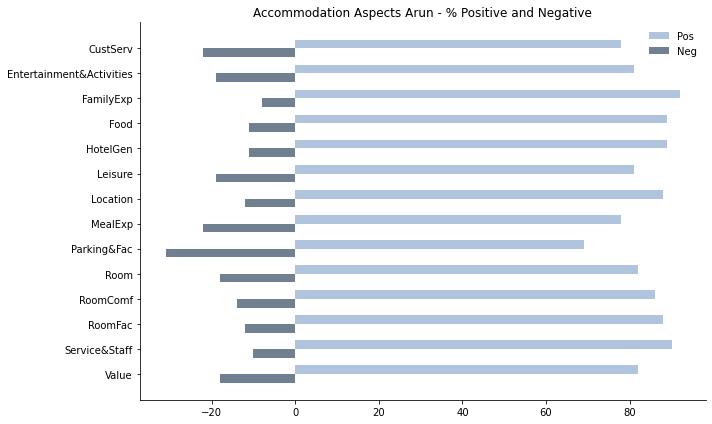

In [33]:
graph_sentiment_numbers("Accommodation Aspects Arun",accom_sent)

### Split down by town

In [34]:
arundel_accom_aspects_pos = df_accom[(df_accom["Town"] == "Arundel") & (df_accom["Score"] == "positive")]
arundel_accom_aspects_neg = df_accom[(df_accom["Town"] == "Bognor") & (df_accom["Score"] == "negative")]
bognor_accom_aspects_pos = df_accom[(df_accom["Town"] == "Bognor") & (df_accom["Score"] == "positive")]
bognor_accom_aspects_neg = df_accom[(df_accom["Town"] == "Bognor") & (df_accom["Score"] == "negative")]
little_accom_aspects_pos = df_accom[(df_accom["Town"] == "Littlehampton") & (df_accom["Score"] == "positive")]
little_accom_aspects_neg = df_accom[(df_accom["Town"] == "Littlehampton") & (df_accom["Score"] == "negative")]

In [35]:
# Create dataframe to compare percentages for each aspect for the town
def aspect_perc(df1,df2):
    df_pos = pd.DataFrame(df1["Topic Count"].value_counts())
    df_neg = pd.DataFrame(df2["Topic Count"].value_counts())
    df_comb = pd.concat([df_pos,df_neg],axis = 1)
    df_comb.columns = ["Num Pos","Num Neg"]
    df_comb["%Pos"] = round(df_comb["Num Pos"]/(df_comb["Num Pos"] + df_comb["Num Neg"]),2)*100
    df_comb["%Neg"] = round(df_comb["Num Neg"]/(df_comb["Num Neg"] + df_comb["Num Pos"]),2)*100
    df_comb.sort_index(inplace = True)
    
    return df_comb


### Arundel

In [36]:
arundel_percent = aspect_perc(arundel_accom_aspects_pos,arundel_accom_aspects_neg)
arundel_percent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,136,60,69.0,31.0
Entertainment&Activities,172,174,50.0,50.0
FamilyExp,174,38,82.0,18.0
Food,228,39,85.0,15.0
HotelGen,164,22,88.0,12.0
Leisure,48,56,46.0,54.0
Location,228,36,86.0,14.0
MealExp,161,64,72.0,28.0
Parking&Fac,46,30,61.0,39.0
Room,580,216,73.0,27.0


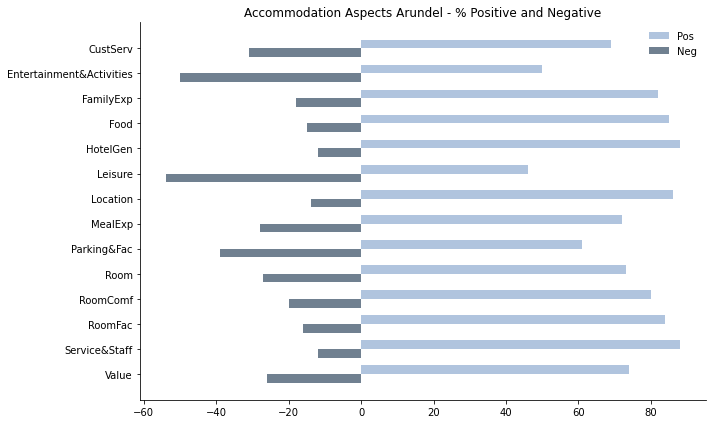

In [37]:
graph_sentiment_numbers("Accommodation Aspects Arundel",arundel_percent)

### Bognor

In [38]:
bognor_percent = aspect_perc(bognor_accom_aspects_pos,bognor_accom_aspects_neg)
bognor_percent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,170,60,74.0,26.0
Entertainment&Activities,750,174,81.0,19.0
FamilyExp,464,38,92.0,8.0
Food,274,39,88.0,12.0
HotelGen,150,22,87.0,13.0
Leisure,198,56,78.0,22.0
Location,192,36,84.0,16.0
MealExp,235,64,79.0,21.0
Parking&Fac,75,30,71.0,29.0
Room,744,216,78.0,22.0


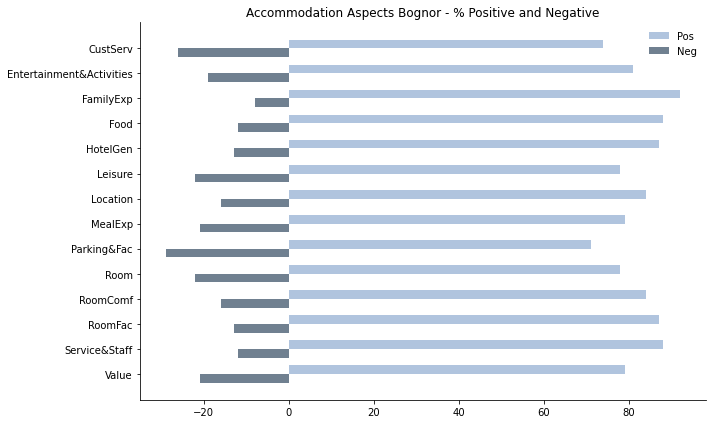

In [39]:
graph_sentiment_numbers("Accommodation Aspects Bognor",bognor_percent)

### Littlehampton

In [40]:
little_percent = aspect_perc(little_accom_aspects_pos,little_accom_aspects_neg)
little_percent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,109,32,77.0,23.0
Entertainment&Activities,183,42,81.0,19.0
FamilyExp,163,14,92.0,8.0
Food,138,23,86.0,14.0
HotelGen,98,7,93.0,7.0
Leisure,89,8,92.0,8.0
Location,177,20,90.0,10.0
MealExp,156,40,80.0,20.0
Parking&Fac,84,27,76.0,24.0
Room,354,62,85.0,15.0


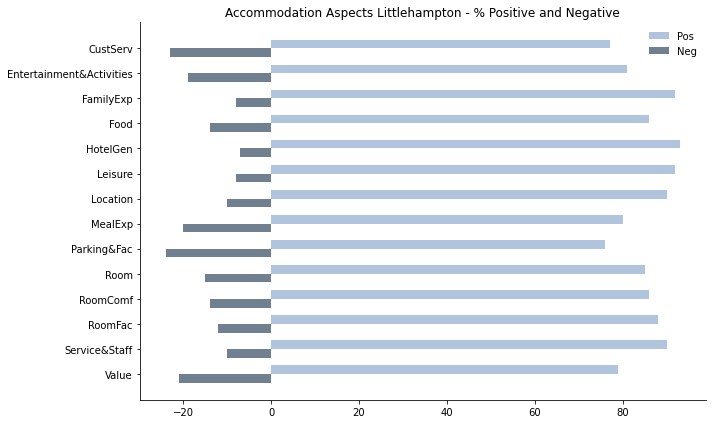

In [41]:
graph_sentiment_numbers("Accommodation Aspects Littlehampton",little_percent)

### Food

In [42]:
food_sent = aspect_all(df_food)
food_sent

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,890,241,79.0,21.0
Choice,1029,97,91.0,9.0
FoodGen,4527,468,91.0,9.0
FoodPort,777,91,90.0,10.0
MealExp,1310,153,90.0,10.0
Menu,758,79,91.0,9.0
Ordering,717,166,81.0,19.0
Quality,816,150,84.0,16.0
Service,1816,270,87.0,13.0
StaffGen,1831,241,88.0,12.0


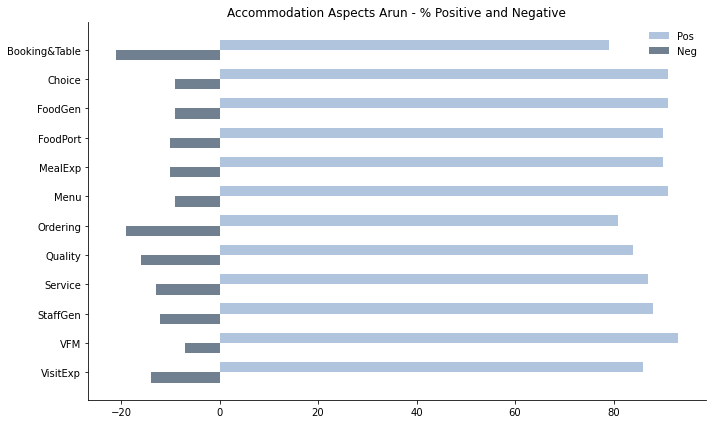

In [43]:
graph_sentiment_numbers("Accommodation Aspects Arun",food_sent)

### Split down by town

In [44]:
arundel_food_aspects_pos = df_food[(df_food["Town"] == "Arundel") & (df_food["Score"] == "positive")]
arundel_food_aspects_neg = df_food[(df_food["Town"] == "Bognor") & (df_food["Score"] == "negative")]
bognor_food_aspects_pos = df_food[(df_food["Town"] == "Bognor") & (df_food["Score"] == "positive")]
bognor_food_aspects_neg = df_food[(df_food["Town"] == "Bognor") & (df_food["Score"] == "negative")]
little_food_aspects_pos = df_food[(df_food["Town"] == "Littlehampton") & (df_food["Score"] == "positive")]
little_food_aspects_neg = df_food[(df_food["Town"] == "Littlehampton") & (df_food["Score"] == "negative")]

### Arundel

In [45]:
arundel_percent_food = aspect_perc(arundel_food_aspects_pos,arundel_food_aspects_neg)
arundel_percent_food

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,366,82,82.0,18.0
Choice,421,20,95.0,5.0
FoodGen,1635,176,90.0,10.0
FoodPort,281,34,89.0,11.0
MealExp,441,53,89.0,11.0
Menu,284,25,92.0,8.0
Ordering,270,68,80.0,20.0
Quality,265,56,83.0,17.0
Service,586,102,85.0,15.0
StaffGen,656,79,89.0,11.0


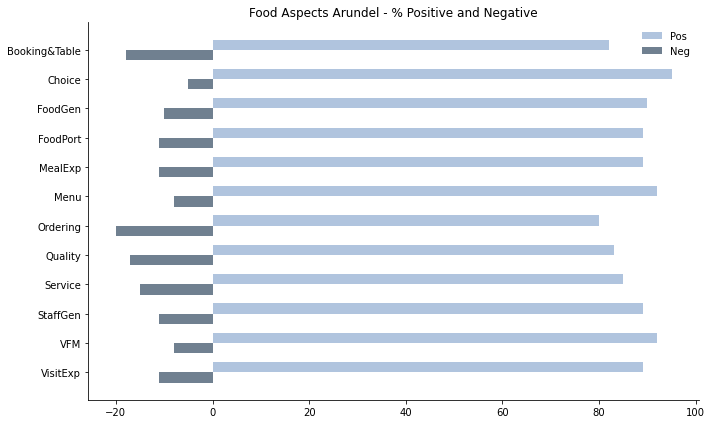

In [46]:
graph_sentiment_numbers("Food Aspects Arundel",arundel_percent_food)

### Bognor

In [47]:
bognor_percent_food = aspect_perc(bognor_food_aspects_pos,bognor_food_aspects_neg)
bognor_percent_food

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,230,82,74.0,26.0
Choice,345,20,95.0,5.0
FoodGen,1629,176,90.0,10.0
FoodPort,277,34,89.0,11.0
MealExp,481,53,90.0,10.0
Menu,249,25,91.0,9.0
Ordering,245,68,78.0,22.0
Quality,285,56,84.0,16.0
Service,742,102,88.0,12.0
StaffGen,646,79,89.0,11.0


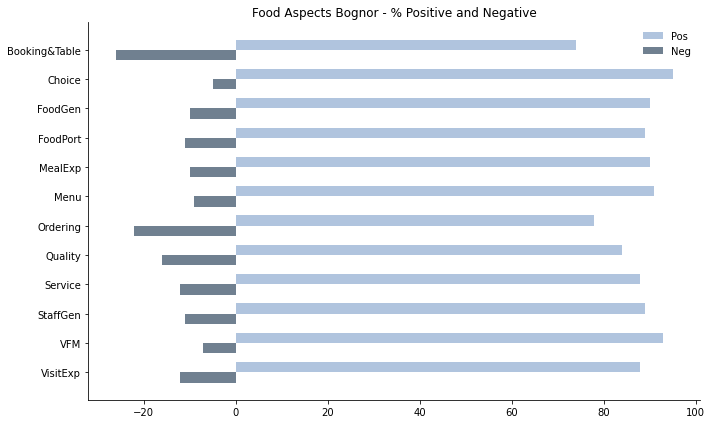

In [48]:
graph_sentiment_numbers("Food Aspects Bognor",bognor_percent_food)

### Littlehampton

In [49]:
little_percent_food = aspect_perc(little_food_aspects_pos,little_food_aspects_neg)
little_percent_food

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,294,84,78.0,22.0
Choice,263,42,86.0,14.0
FoodGen,1263,153,89.0,11.0
FoodPort,219,30,88.0,12.0
MealExp,388,58,87.0,13.0
Menu,225,35,87.0,13.0
Ordering,202,43,82.0,18.0
Quality,266,53,83.0,17.0
Service,488,83,85.0,15.0
StaffGen,529,89,86.0,14.0


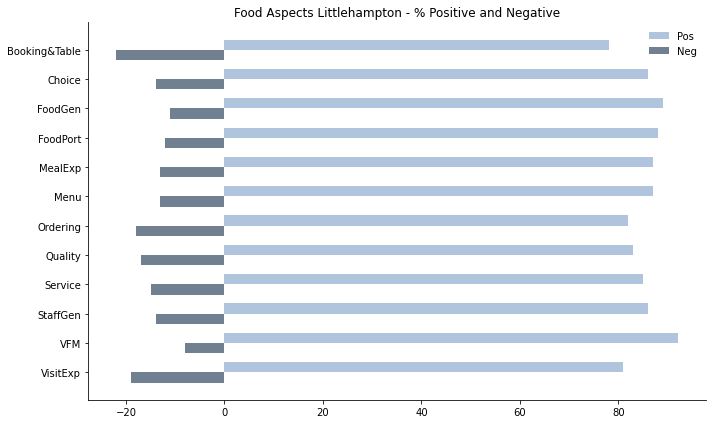

In [50]:
graph_sentiment_numbers("Food Aspects Littlehampton",little_percent_food)

### Attractions

In [51]:
attract_sent = aspect_all(df_attract)
attract_sent

,Num Pos,Num Neg,%Pos,%Neg
BeachFac,212,18,92.0,8.0
FamilyExp,565,50,92.0,8.0
Food,299,40,88.0,12.0
Gardens&Grounds,221,23,91.0,9.0
Kids&PlayArea,225,51,82.0,18.0
Parking,131,18,88.0,12.0
Place,180,10,95.0,5.0
Shop&Amenties,215,26,89.0,11.0
Staff,192,15,93.0,7.0
VFM,218,42,84.0,16.0


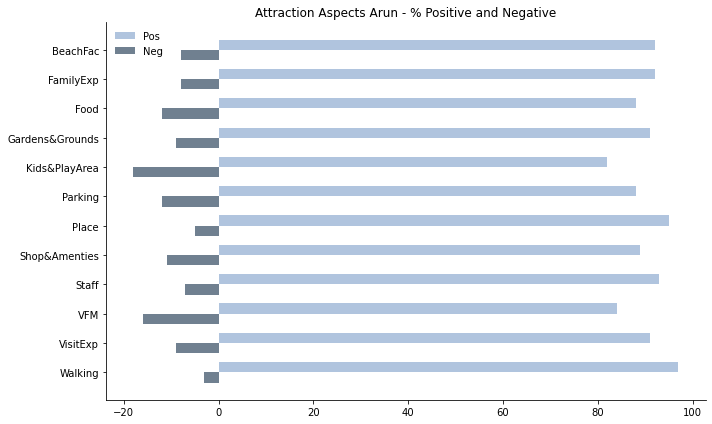

In [52]:
graph_sentiment_numbers("Attraction Aspects Arun",attract_sent)

## Split down by town

In [53]:
arundel_attract_aspects_pos = df_attract[(df_attract["Town"] == "Arundel") & (df_attract["Score"] == "positive")]
arundel_attract_aspects_neg = df_attract[(df_attract["Town"] == "Bognor") & (df_attract["Score"] == "negative")]
bognor_attract_aspects_pos = df_attract[(df_attract["Town"] == "Bognor") & (df_attract["Score"] == "positive")]
bognor_attract_aspects_neg = df_attract[(df_attract["Town"] == "Bognor") & (df_attract["Score"] == "negative")]
little_attract_aspects_pos = df_attract[(df_attract["Town"] == "Littlehampton") & (df_attract["Score"] == "positive")]
little_attract_aspects_neg = df_attract[(df_attract["Town"] == "Littlehampton") & (df_attract["Score"] == "negative")]

### Arundel

In [54]:
arundel_percent_attract = aspect_perc(arundel_attract_aspects_pos,arundel_attract_aspects_neg)
arundel_percent_attract

,Num Pos,Num Neg,%Pos,%Neg
BeachFac,89,10,90.0,10.0
FamilyExp,295,17,95.0,5.0
Food,174,6,97.0,3.0
Gardens&Grounds,199,3,99.0,1.0
Kids&PlayArea,125,15,89.0,11.0
Parking,47,7,87.0,13.0
Place,103,4,96.0,4.0
Shop&Amenties,134,11,92.0,8.0
Staff,100,2,98.0,2.0
VFM,61,24,72.0,28.0


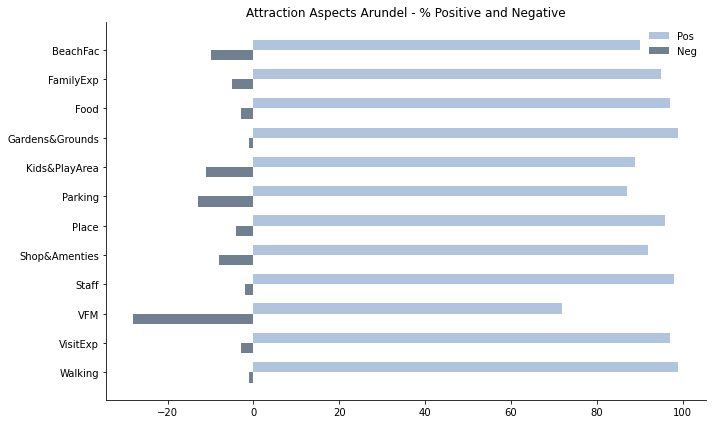

In [55]:
graph_sentiment_numbers("Attraction Aspects Arundel",arundel_percent_attract)

### Bognor

In [56]:
bognor_percent_attract = aspect_perc(bognor_attract_aspects_pos,bognor_attract_aspects_neg)
bognor_percent_attract

,Num Pos,Num Neg,%Pos,%Neg
BeachFac,42,10,81.0,19.0
FamilyExp,177,17,91.0,9.0
Food,74,6,92.0,8.0
Gardens&Grounds,14,3,82.0,18.0
Kids&PlayArea,50,15,77.0,23.0
Parking,64,7,90.0,10.0
Place,53,4,93.0,7.0
Shop&Amenties,46,11,81.0,19.0
Staff,52,2,96.0,4.0
VFM,114,24,83.0,17.0


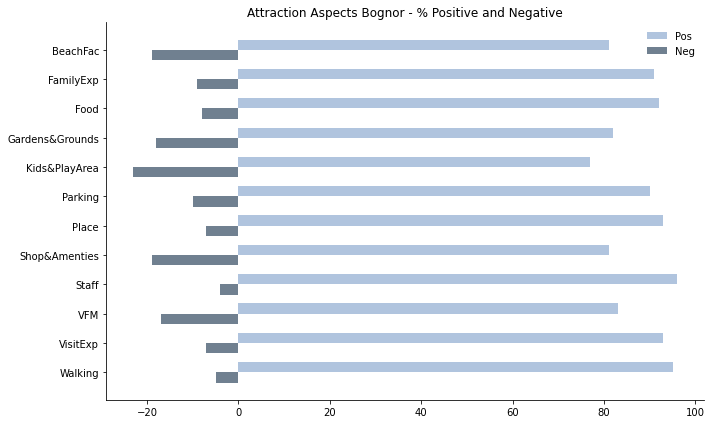

In [57]:
graph_sentiment_numbers("Attraction Aspects Bognor",bognor_percent_attract)

### Littlehampton

In [58]:
little_percent_attract = aspect_perc(little_attract_aspects_pos,little_attract_aspects_neg)
little_percent_attract

,Num Pos,Num Neg,%Pos,%Neg
BeachFac,81,5,94.0,6.0
FamilyExp,93,9,91.0,9.0
Food,51,13,80.0,20.0
Gardens&Grounds,8,2,80.0,20.0
Kids&PlayArea,50,2,96.0,4.0
Parking,20,4,83.0,17.0
Place,24,2,92.0,8.0
Shop&Amenties,35,8,81.0,19.0
Staff,40,3,93.0,7.0
VFM,43,10,81.0,19.0


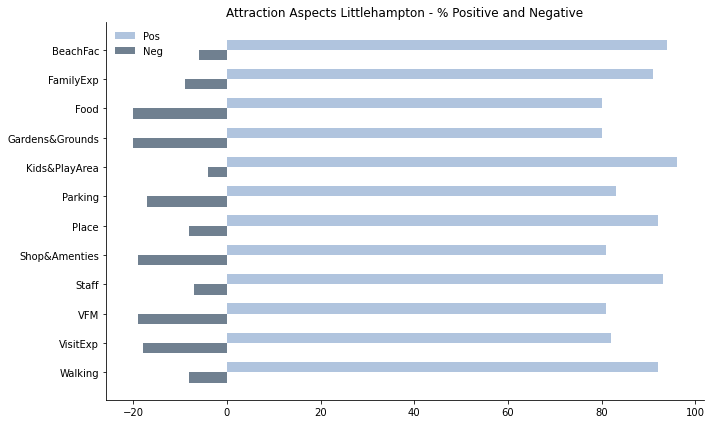

In [59]:
graph_sentiment_numbers("Attraction Aspects Littlehampton",little_percent_attract)

# Section 4: Sentiment Scores across categories

Across the district, what aspects were people most positive about?

## Accommodation

In [60]:
accom_summary = df_accom[df_accom["Sentiment"]!=0].groupby("Topic Count",as_index = False)["Sentiment"].mean()
accom_summary = accom_summary.sort_values(by = "Sentiment",ascending = False)
accom_summary

,Topic Count,Sentiment
2,FamilyExp,0.453345
6,Location,0.443510
12,Service&Staff,0.436200
3,Food,0.425977
4,HotelGen,0.421597
13,Value,0.415387
11,RoomFac,0.368441
10,RoomComf,0.356394
9,Room,0.333280
0,CustServ,0.331614


In [61]:
def plot_sent_score(df,name,name2):
    
    labels = list(df["Topic Count"])
    sent = list(df["Sentiment"])
  
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize = (10,7))
    ax.barh(x, sent, width, label='Sentiment Score',color = "lightsteelblue",ec = "grey")
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(name + " - Mean Sentiment Score " + name2)
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.set_xlabel("Mean Sentiment Score",labelpad = 15)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(frameon = False, loc = "best")
    ax.invert_yaxis()

    fig.tight_layout()

    plt.show()

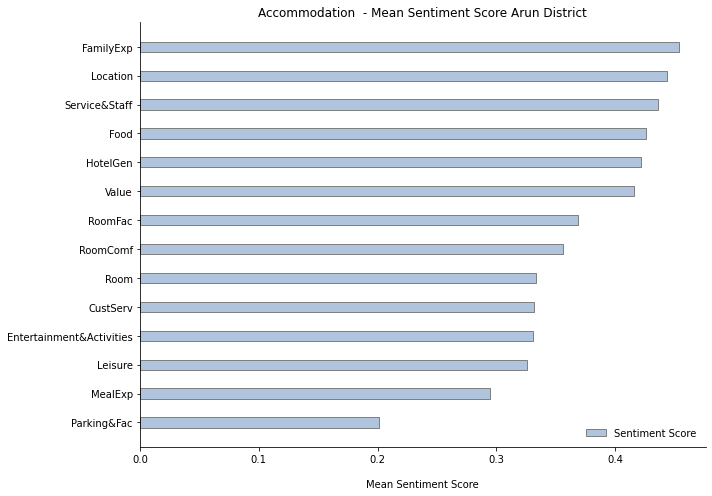

In [62]:
plot_sent_score(accom_summary,"Accommodation ","Arun District")

In [63]:
food_summary = df_food[df_food["Sentiment"]!=0].groupby("Topic Count",as_index = False)["Sentiment"].mean()
food_summary = food_summary.sort_values(by = "Sentiment",ascending = False)
food_summary

,Topic Count,Sentiment
10,VFM,0.548847
2,FoodGen,0.448014
1,Choice,0.442594
5,Menu,0.433931
9,StaffGen,0.431486
8,Service,0.428466
4,MealExp,0.418343
3,FoodPort,0.414606
7,Quality,0.371306
6,Ordering,0.348842


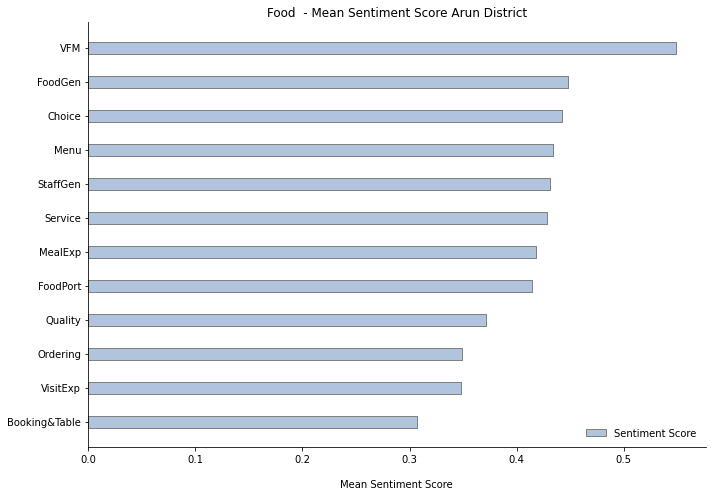

In [64]:
plot_sent_score(food_summary,"Food ","Arun District")

In [65]:
attract_summary = df_attract[df_attract["Sentiment"]!=0].groupby("Topic Count",as_index = False)["Sentiment"].mean()
attract_summary = attract_summary.sort_values(by = "Sentiment",ascending = False)
attract_summary

,Topic Count,Sentiment
11,Walking,0.489072
6,Place,0.480263
8,Staff,0.476335
3,Gardens&Grounds,0.469114
1,FamilyExp,0.458127
0,BeachFac,0.441330
7,Shop&Amenties,0.419679
5,Parking,0.417105
9,VFM,0.416751
2,Food,0.403824


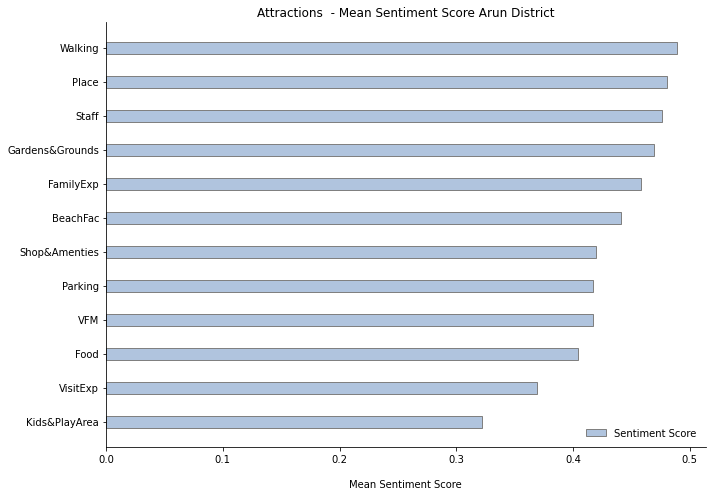

In [66]:
plot_sent_score(attract_summary,"Attractions ","Arun District")

# Section 5: Mean Sentiment Score Analysis By Town

## Accommodation

In [67]:
towns_accom = df_accom.groupby(["Topic Count","Town"],as_index = False)["Sentiment"].mean()
arundel_accom = towns_accom[towns_accom["Town"] == "Arundel"]
bognor_accom = towns_accom[towns_accom["Town"] == "Bognor"]
little_accom = towns_accom[towns_accom["Town"] == "Littlehampton"]

### Arundel

In [68]:
arundel_accom = arundel_accom.sort_values(by = "Sentiment",ascending = False)
arundel_accom

,Topic Count,Town,Sentiment
39,Value,Arundel,0.342877
36,Service&Staff,Arundel,0.323625
9,Food,Arundel,0.254120
18,Location,Arundel,0.231904
0,CustServ,Arundel,0.210840
6,FamilyExp,Arundel,0.207450
27,Room,Arundel,0.187569
30,RoomComf,Arundel,0.185765
12,HotelGen,Arundel,0.175401
33,RoomFac,Arundel,0.146623


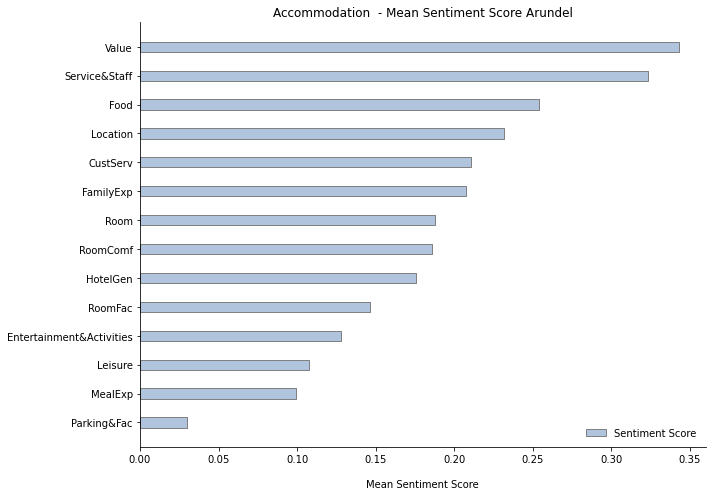

In [69]:
plot_sent_score(arundel_accom,"Accommodation ","Arundel")

### Bognor

In [70]:
bognor_accom = bognor_accom.sort_values(by = "Sentiment",ascending = False)
bognor_accom

,Topic Count,Town,Sentiment
37,Service&Staff,Bognor,0.248864
7,FamilyExp,Bognor,0.232340
40,Value,Bognor,0.223687
10,Food,Bognor,0.189728
19,Location,Bognor,0.171960
1,CustServ,Bognor,0.152190
4,Entertainment&Activities,Bognor,0.134732
13,HotelGen,Bognor,0.126305
31,RoomComf,Bognor,0.126073
28,Room,Bognor,0.122634


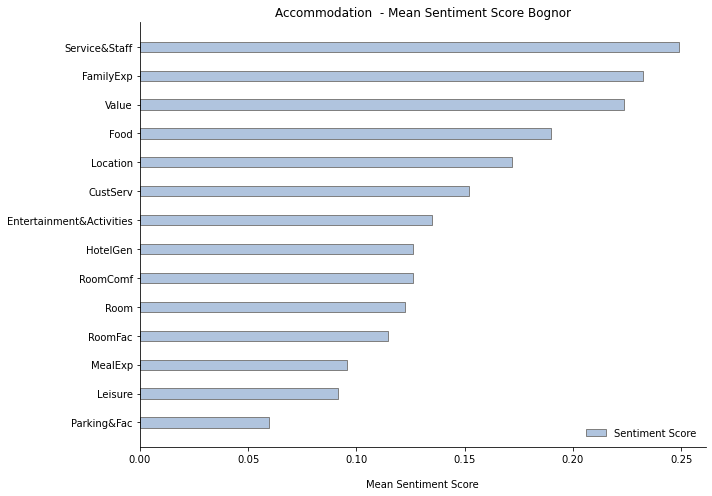

In [71]:
plot_sent_score(bognor_accom,"Accommodation ","Bognor")

### Littlehampton

In [72]:
little_accom = little_accom.sort_values(by = "Sentiment",ascending = False)
little_accom

,Topic Count,Town,Sentiment
38,Service&Staff,Littlehampton,0.292793
41,Value,Littlehampton,0.259593
8,FamilyExp,Littlehampton,0.225368
11,Food,Littlehampton,0.220082
14,HotelGen,Littlehampton,0.213256
20,Location,Littlehampton,0.190566
2,CustServ,Littlehampton,0.178887
17,Leisure,Littlehampton,0.174500
29,Room,Littlehampton,0.170296
32,RoomComf,Littlehampton,0.165428


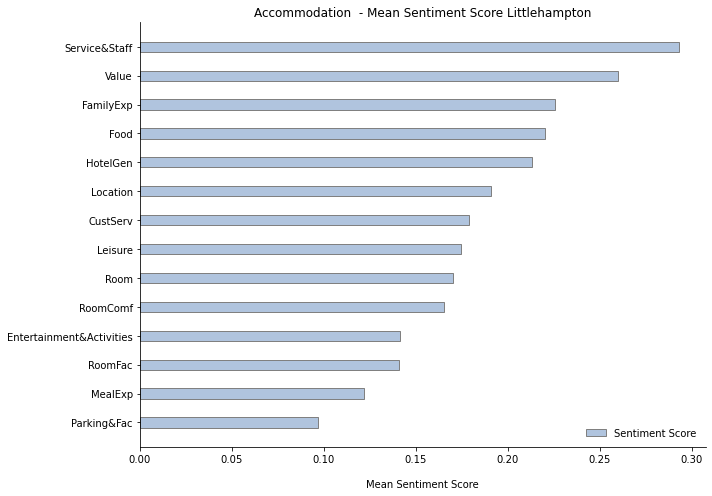

In [73]:
plot_sent_score(little_accom,"Accommodation ","Littlehampton")

## Food

In [74]:
towns_food  = df_food.groupby(["Topic Count","Town"],as_index = False)["Sentiment"].mean()
arundel_food = towns_food[towns_food["Town"] == "Arundel"]
bognor_food = towns_food[towns_food["Town"] == "Bognor"]
little_food = towns_food[towns_food["Town"] == "Littlehampton"]

### Arundel

In [75]:
arundel_food = arundel_food.sort_values(by = "Sentiment",ascending = False)
arundel_food

,Topic Count,Town,Sentiment
30,VFM,Arundel,0.391156
24,Service,Arundel,0.284218
27,StaffGen,Arundel,0.275726
6,FoodGen,Arundel,0.275686
12,MealExp,Arundel,0.200123
3,Choice,Arundel,0.179822
33,VisitExp,Arundel,0.161217
21,Quality,Arundel,0.160981
15,Menu,Arundel,0.160940
9,FoodPort,Arundel,0.155138


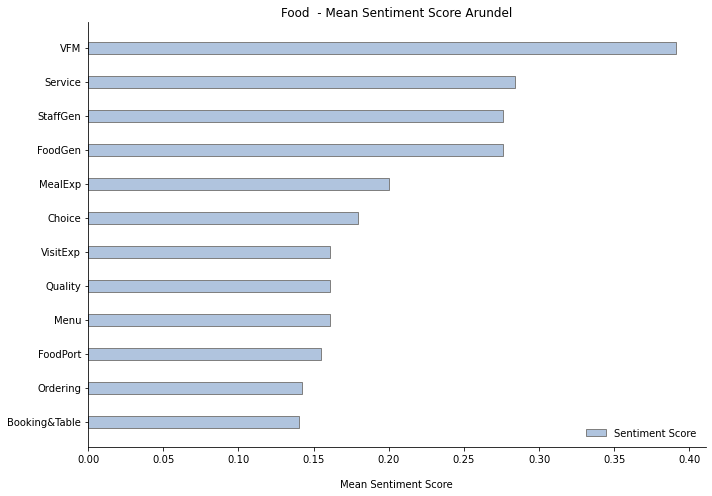

In [76]:
plot_sent_score(arundel_food,"Food ","Arundel")

### Bognor

In [77]:
bognor_food = bognor_food.sort_values(by = "Sentiment",ascending = False)
bognor_food

,Topic Count,Town,Sentiment
31,VFM,Bognor,0.389113
25,Service,Bognor,0.293954
28,StaffGen,Bognor,0.266468
7,FoodGen,Bognor,0.256280
13,MealExp,Bognor,0.186536
4,Choice,Bognor,0.166356
22,Quality,Bognor,0.166115
34,VisitExp,Bognor,0.149792
16,Menu,Bognor,0.142584
10,FoodPort,Bognor,0.128661


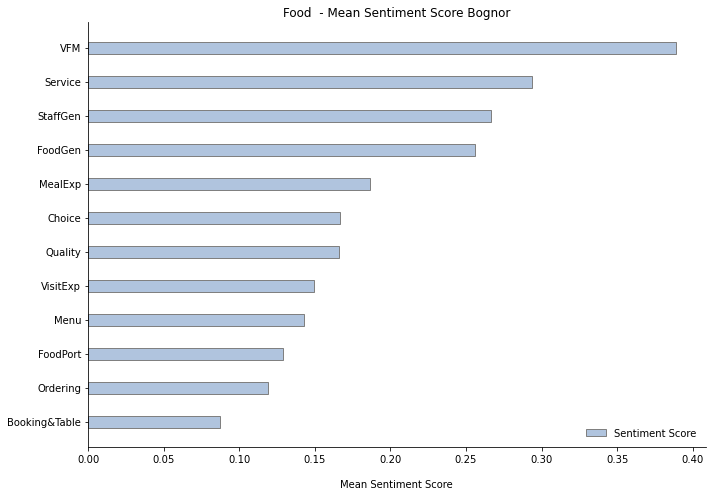

In [78]:
plot_sent_score(bognor_food,"Food ","Bognor")

### Littlehampton

In [79]:
little_food = little_food.sort_values(by = "Sentiment",ascending = False)
little_food

,Topic Count,Town,Sentiment
32,VFM,Littlehampton,0.369798
26,Service,Littlehampton,0.276122
8,FoodGen,Littlehampton,0.238168
29,StaffGen,Littlehampton,0.235509
23,Quality,Littlehampton,0.177069
14,MealExp,Littlehampton,0.172951
5,Choice,Littlehampton,0.134846
17,Menu,Littlehampton,0.133808
11,FoodPort,Littlehampton,0.123844
35,VisitExp,Littlehampton,0.120906


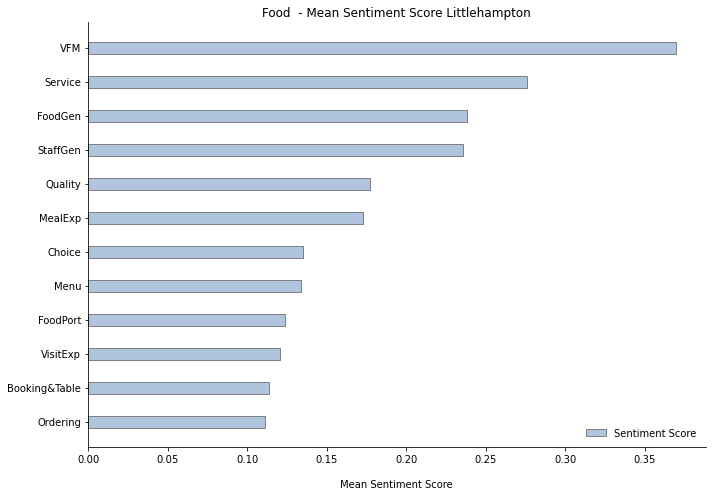

In [80]:
plot_sent_score(little_food,"Food ","Littlehampton")

## Attractions

In [81]:
towns_attract  = df_attract.groupby(["Topic Count","Town"],as_index = False)["Sentiment"].mean()
arundel_attract = towns_attract[towns_attract["Town"] == "Arundel"]
bognor_attract = towns_attract[towns_attract["Town"] == "Bognor"]
little_attract = towns_attract[towns_attract["Town"] == "Littlehampton"]

### Arundel

In [82]:
arundel_attract = arundel_attract.sort_values(by = "Sentiment",ascending = False)
arundel_attract

,Topic Count,Town,Sentiment
18,Place,Arundel,0.282258
27,VFM,Arundel,0.277924
24,Staff,Arundel,0.266968
9,Gardens&Grounds,Arundel,0.245217
0,BeachFac,Arundel,0.239386
33,Walking,Arundel,0.221318
6,Food,Arundel,0.189482
21,Shop&Amenties,Arundel,0.187879
30,VisitExp,Arundel,0.180995
3,FamilyExp,Arundel,0.174062


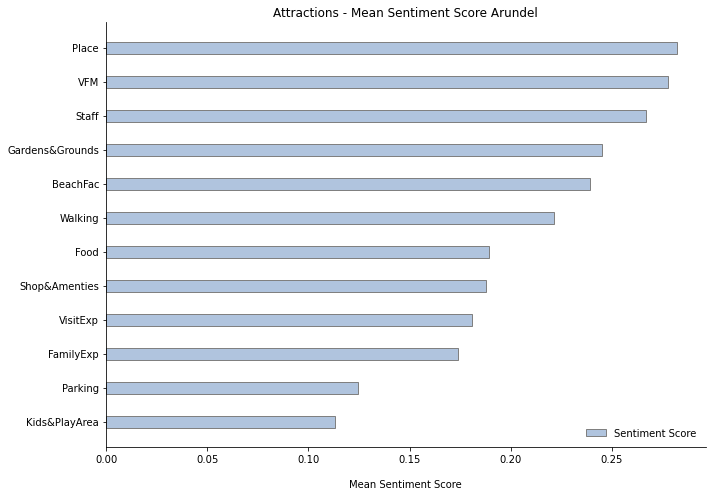

In [83]:
plot_sent_score(arundel_attract,"Attractions","Arundel")

### Bognor

In [84]:
bognor_attract = bognor_attract.sort_values(by = "Sentiment",ascending = False)
bognor_attract

,Topic Count,Town,Sentiment
19,Place,Bognor,0.329709
25,Staff,Bognor,0.324057
28,VFM,Bognor,0.285303
4,FamilyExp,Bognor,0.231689
16,Parking,Bognor,0.218762
31,VisitExp,Bognor,0.202716
7,Food,Bognor,0.200459
10,Gardens&Grounds,Bognor,0.169466
34,Walking,Bognor,0.157890
1,BeachFac,Bognor,0.155775


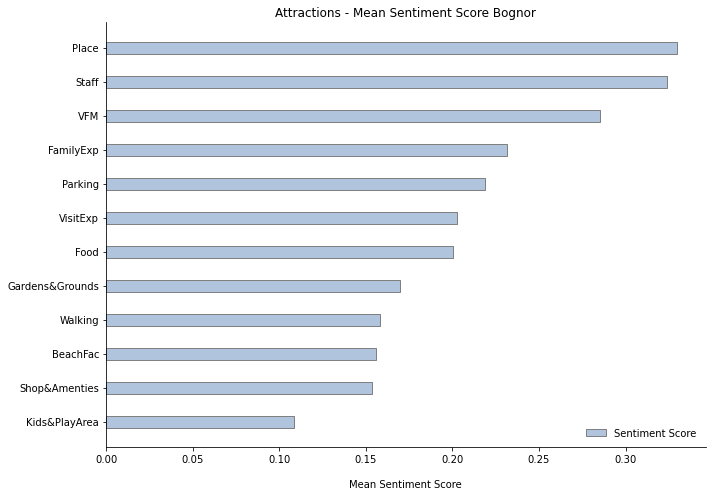

In [85]:
plot_sent_score(bognor_attract,"Attractions","Bognor")

### Littlehampton

In [86]:
little_attract = little_attract.sort_values(by = "Sentiment",ascending = False)
little_attract

,Topic Count,Town,Sentiment
26,Staff,Littlehampton,0.290159
20,Place,Littlehampton,0.244409
5,FamilyExp,Littlehampton,0.230559
35,Walking,Littlehampton,0.212849
11,Gardens&Grounds,Littlehampton,0.205940
29,VFM,Littlehampton,0.201389
2,BeachFac,Littlehampton,0.196122
14,Kids&PlayArea,Littlehampton,0.190941
32,VisitExp,Littlehampton,0.165349
8,Food,Littlehampton,0.147160


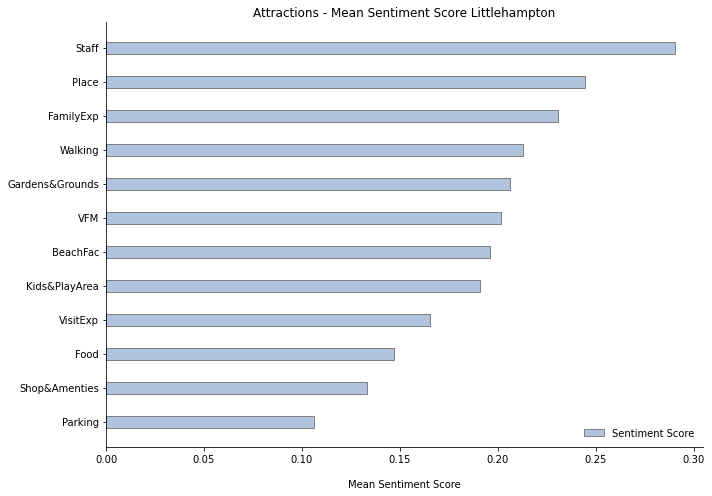

In [87]:
plot_sent_score(little_attract,"Attractions","Littlehampton")

# Section 5: Comparing Aspects and Towns Together

In [88]:
def compare_towns(df1,df2,df3,name):
    
    # Set variables
    labels = list(df1["Topic Count"])
    
    y1 = list(df1["Sentiment"])
    y2 = list(df2["Sentiment"])
    y3 = list(df3["Sentiment"])
    height = 0.25
    
    r1 = np.arange(len(y1))
    r2 = [x + height for x in r1]
    r3 = [x + height for x in r2]
    
    # Plot chart
    fig, ax = plt.subplots(figsize = (14,12),)
    plt.barh(r1, y1, height = height, color = "lightgrey",label='Arundel',ec = "darkgrey")
    plt.barh(r2, y2, height = height, color = "lightsteelblue",label='Bognor',ec = "darkgrey")
    plt.barh(r3, y3, height = height, label='Littlehampton',ec = "darkgrey")
    
    # Set labels, legend etc
    ax.set_xlabel('Compound Sentiment Score',labelpad = 10,fontsize = 12)
    ax.set_ylabel("Topic", labelpad = 10,fontsize = 12)
    plt.yticks([r + height for r in range(len(y1))], labels)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(name + " - Mean Sentiment Score ",fontsize = 15)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels),frameon = False)
    ax.invert_yaxis()
    plt.show()

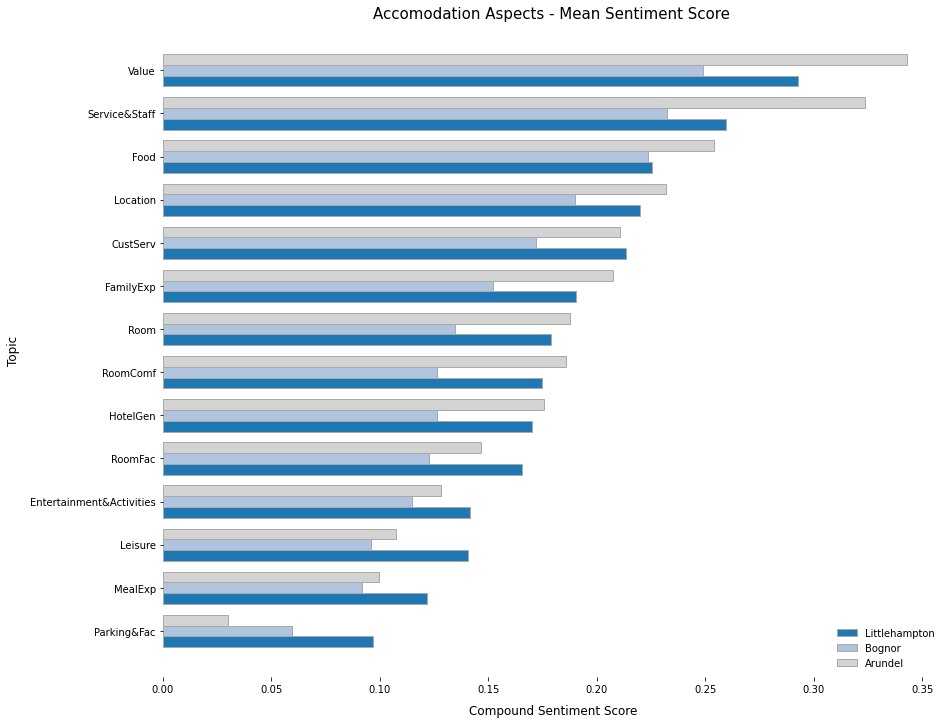

In [89]:
compare_towns(arundel_accom,bognor_accom,little_accom,"Accomodation Aspects")

* Bognor scores the lowest in all categories except Parking & Facilities
* Parking, leisure facilities and meal experiences are among the lowest sentiment scores
* Arundel and Littlehampton score highly for Staff and Service
* Arundel scores highly for value


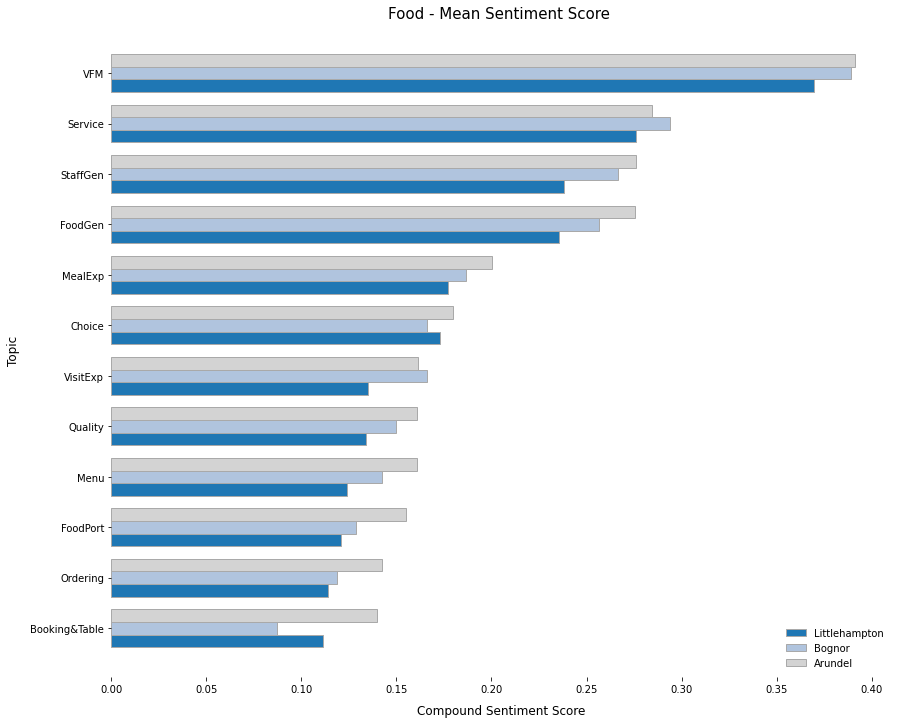

In [90]:
compare_towns(arundel_food,bognor_food,little_food,"Food")

* All towns score highly for value for money with Bognor having the highest average compound sentiment score
* Bognor also scores highest for service
* The lowest scored category is Food Portions and Visit Experience

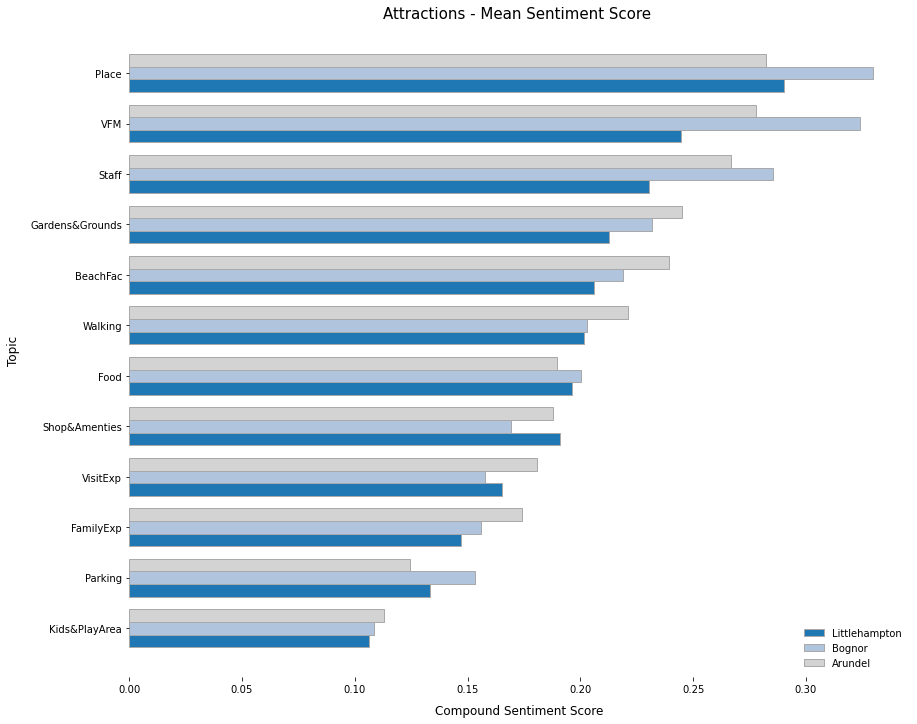

In [91]:
compare_towns(arundel_attract,bognor_attract,little_attract,"Attractions")

* The aspect with the highest mean sentiment score is 'Staff' and Bognor scores the highest of these
* Bognor also scores highest for value for money attractions
* Among the lowest scored aspects relating to attractions are parking, play facilities and food

In [92]:
# Implode dataframe back to sentence level from noun phrase level
#df_comb = df.groupby(["OrigInd","Category","Town","Rating","all_text","sentences","cleaned_sentences"]).agg({'noun_phrases':lambda x: " ".join(x)}).rename({'noun_phrases':'sentence'},axis = 1).reset_index()
#df_comb.drop(columns = ["sentence"],axis = 1,inplace = True)